# Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
X=pd.DataFrame(iris['data'],columns=['sepal_length','sepal_width','petal_length','petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y=iris['target']

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [6]:
# Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train,y_train)
y_pred=treeclassifier.predict(X_test)

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 

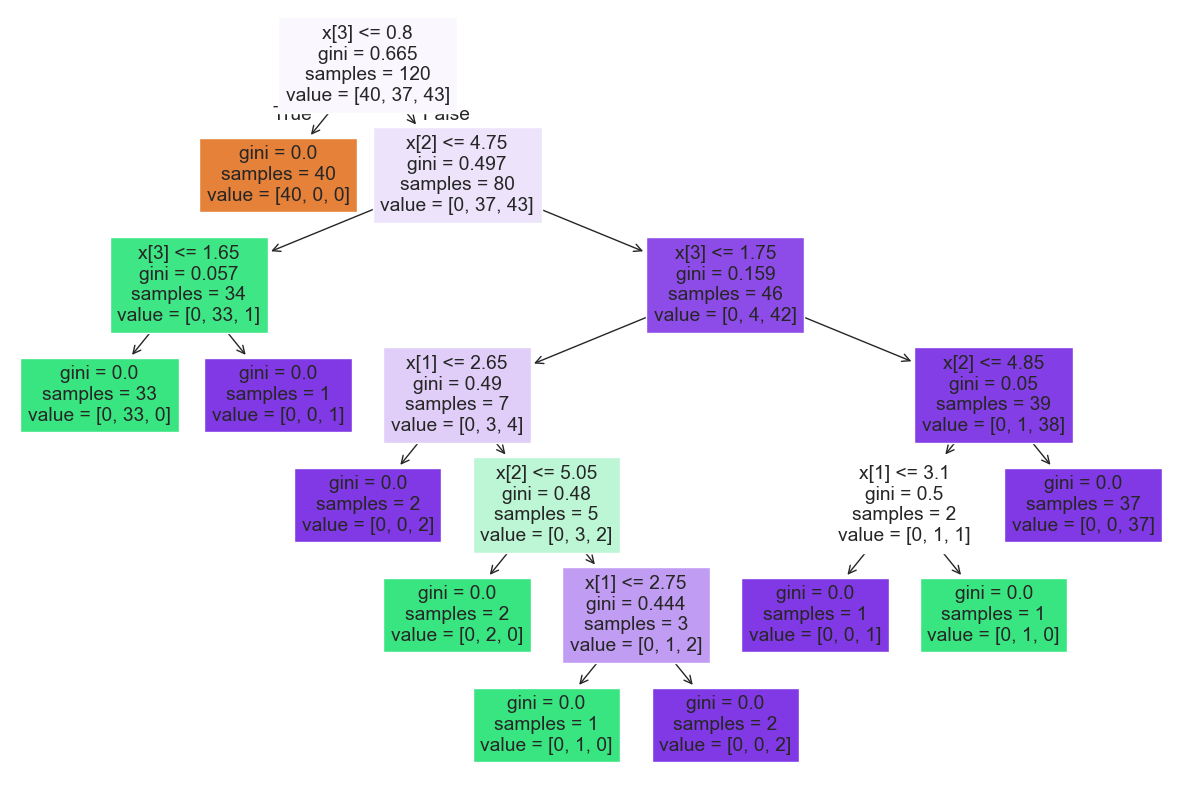

In [7]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



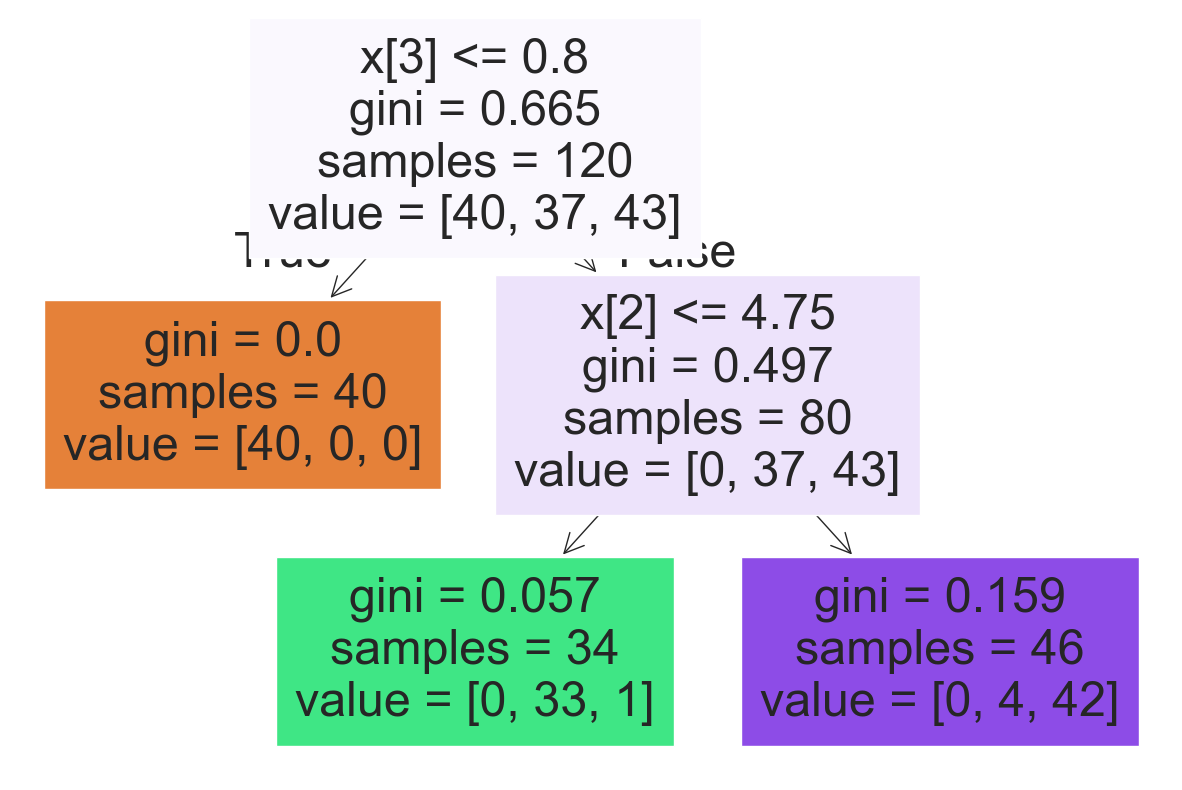

In [9]:
treeclassifier=DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(X_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
y_pred=treeclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [10]:
param={'criterion':['gini','entropy','log_loss'],
       'splitter':['best','random'],
       'max_depth':[1,2,3,4,5],
       'max_features':['auto','sqrt','log2']}

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
grid=GridSearchCV(estimator=treeclassifier,param_grid=param,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [14]:
grid.best_score_

np.float64(0.9583333333333334)

In [16]:
grid_pred=grid.predict(X_test)
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Decision Tree Regressor

In [17]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
df_diabetes=pd.DataFrame(dataset.data, columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [18]:
# Independent and dependent features
X=df_diabetes
y=dataset['target']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [20]:
# Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

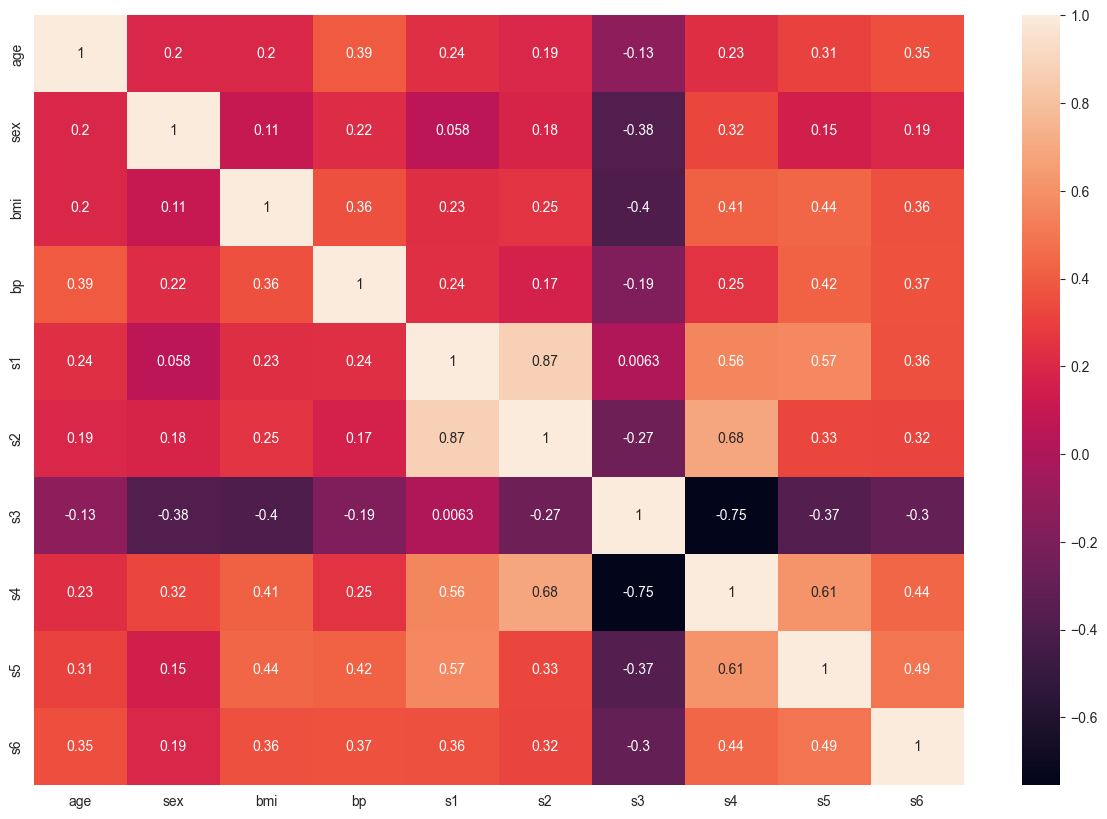

In [21]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
# Hyperparameter Tuning
param={'criterion':['squared_error','friedman_mse','absolute_error'],
       'splitter':['best','random'],
       'max_depth':[1,2,3,4,5,10,15,20,25],
       'max_features':['auto','sqrt','log2']}

In [24]:
import warnings
warnings.filterwarnings('ignore')
grid=GridSearchCV(estimator=regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
grid_pred=grid.predict(X_test)
print(r2_score(y_test,grid_pred))
print(mean_absolute_error(y_test,grid_pred))
print(mean_squared_error(y_test,grid_pred))

0.31132087571116906
54.80069824826016
4357.734988513565


In [27]:
selectmodel=DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_features='sqrt',splitter='best')

In [28]:
selectmodel.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.875, 'x[8] <= 0.022\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[7] <= -0.013\nsquared_error = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= -0.019\nsquared_error = 2599.336\nsamples = 108\nvalue = 104.917'),
 Text(0.0625, 0.125, 'squared_error = 1225.0\nsamples = 2\nvalue = 217.0'),
 Text(0.1875, 0.125, 'squared_error = 2383.763\nsamples = 106\nvalue = 102.802'),
 Text(0.375, 0.375, 'x[6] <= -0.1\nsquared_error = 4786.149\nsamples = 97\nvalue = 144.072'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 341.0'),
 Text(0.4375, 0.125, 'squared_error = 4427.833\nsamples = 96\nvalue = 142.021'),
 Text(0.75, 0.625, 'x[2] <= 0.056\nsquared_error = 4163.865\nsamples = 104\nvalue = 210.481'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.015\nsquared_error = 3463.866\nsamples = 76\nvalue = 192.947'),
 Text(0.5625, 0.125, 'squared_error = 2966.888\nsamples 

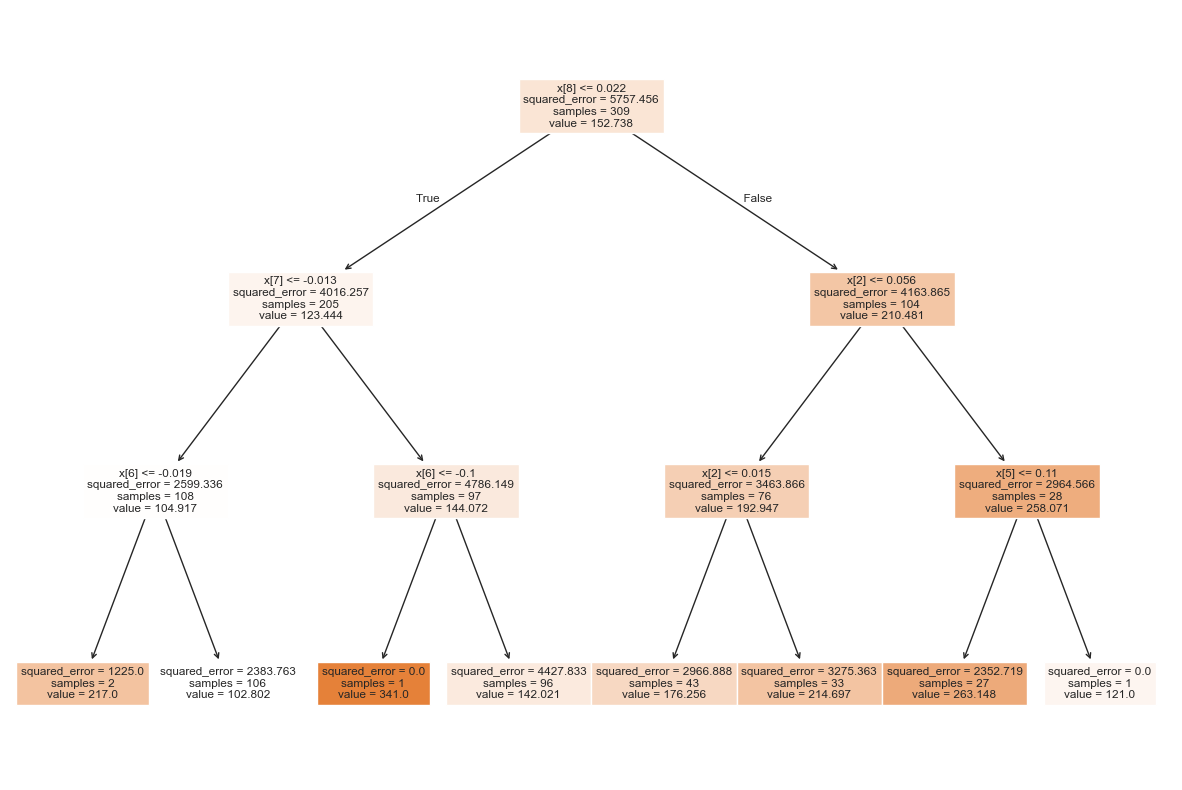

In [29]:
# Visualize the Decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)